# Question-2]Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


In [1]:
import pandas as pd

In [7]:
df=pd.read_csv("E:\\data scines\\Assignment-Data sciencs\\Assocation\\book.csv")
print(df)

      ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  \
0            0         1        0         1       0       0        1   
1            1         0        0         0       0       0        0   
2            0         0        0         0       0       0        0   
3            1         1        1         0       1       0        1   
4            0         0        1         0       0       0        1   
...        ...       ...      ...       ...     ...     ...      ...   
1995         0         0        1         0       0       1        1   
1996         0         0        0         0       0       0        0   
1997         0         0        0         0       0       0        0   
1998         0         0        1         0       0       0        0   
1999         0         0        0         0       0       0        0   

      ItalCook  ItalAtlas  ItalArt  Florence  
0            0          0        0         0  
1            0          0        0       

In [9]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [14]:
df.shape

(2000, 11)

In [15]:
df.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [16]:
df.mode()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [22]:
df.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [24]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996     True
1997     True
1998     True
1999     True
Length: 2000, dtype: bool

In [39]:
!pip install mlxtend

# Visualization¶

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules,fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [26]:
df.corr()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
ChildBks,1.000000,0.282861,0.301188,0.291107,0.299654,0.286600,0.354335,0.236039,0.137784,0.145903,0.016951
YouthBks,0.282861,1.000000,0.258884,0.235362,0.245061,0.224043,0.270534,0.225789,0.102410,0.118612,-0.010086
CookBks,0.301188,0.258884,1.000000,0.295996,0.295417,0.298061,0.332222,0.411127,0.134288,0.188908,0.004782
DoItYBks,0.291107,0.235362,0.295996,1.000000,0.243694,0.288585,0.271783,0.185612,0.100850,0.168864,0.006452
RefBks,0.299654,0.245061,0.295417,0.243694,1.000000,0.215347,0.279570,0.170150,0.375100,0.108833,0.060525
ArtBks,0.286600,0.224043,0.298061,0.288585,0.215347,1.000000,0.318979,0.214842,0.112509,0.400663,0.168036
GeogBks,0.354335,0.270534,0.332222,0.271783,0.279570,0.318979,1.000000,0.230431,0.121925,0.167805,0.090299
ItalCook,0.236039,0.225789,0.411127,0.185612,0.170150,0.214842,0.230431,1.000000,0.313992,0.469540,0.052560
ItalAtlas,0.137784,0.102410,0.134288,0.100850,0.375100,0.112509,0.121925,0.313992,1.000000,0.362652,0.042337
ItalArt,0.145903,0.118612,0.188908,0.168864,0.108833,0.400663,0.167805,0.469540,0.362652,1.000000,0.108331


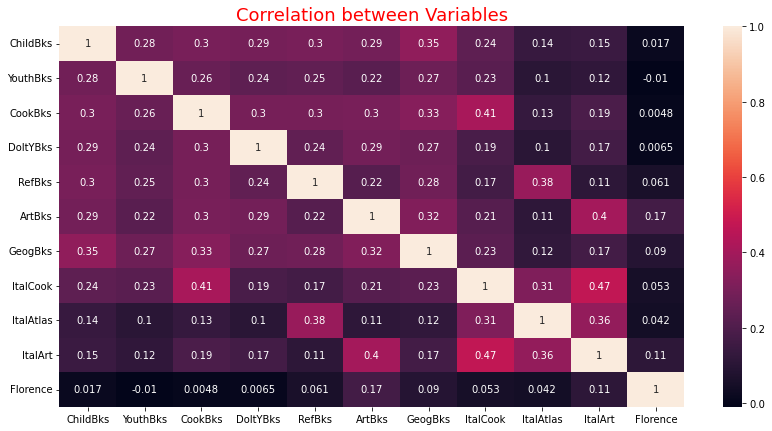

In [29]:
plt.figure(figsize=(14,7))
plt.title('Correlation between Variables',color='red',fontsize=18)
sns.heatmap(data=df.corr(),annot=True)
plt.show()

Apriori Algorithm

In [46]:
frequent_itemsets_ap = apriori(df, min_support= 0.1)

In [47]:
len(frequent_itemsets_ap)

39

In [49]:
frequent_itemsets_ap = apriori(df,min_support=0.1,use_colnames= True,verbose=1)
frequent_itemsets_ap.head(10)

Processing 44 combinations | Sampling itemset size 4


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [50]:
frequent_itemsets_ap.sort_values("support",ascending=False).head()

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
10,0.256,"(CookBks, ChildBks)"


In [51]:
rules_ap = association_rules(frequent_itemsets_ap,metric="confidence",min_threshold=0.4)
rules_ap.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.165,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.423,0.256,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.431,0.256,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.423,0.184,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(DoItYBks),0.4230,0.282,0.184,0.434988,1.542511,0.064714,1.270770


In [52]:
rules_ap[(rules_ap.support>0.015) & (rules_ap.confidence>0.4)].sort_values("confidence",ascending=False).shape

(70, 9)

In [54]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x))
rules_ap[rules_ap['lhs items']>1].sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
57,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
60,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
68,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
67,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
42,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


# Replace Frozen sets with strings¶

In [55]:
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))

Transform the DataFrame of rules into a matrix using the confidence metric

In [56]:
pivot = rules_ap[rules_ap['lhs items']>1].pivot(index='antecedents_',
                 columns='consequents_',values='confidence')

Creating a heatmap with annotations

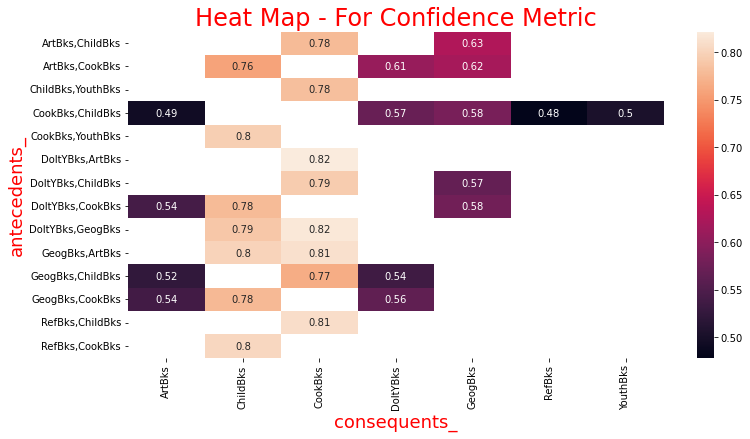

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot,annot = True)
plt.title('Heat Map - For Confidence Metric',color='red',fontsize=24)
plt.xlabel('consequents_',color='red',fontsize=18)
plt.ylabel('antecedents_',color='red',fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [59]:
rules_ap_li = association_rules(frequent_itemsets_ap,metric="lift",min_threshold=0.6)
rules_ap_li.shape

(100, 9)

In [60]:
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x))
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
54,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


Replace Frozen sets with strings

In [61]:
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))

Transform the DataFrame of Rules into a Matrix using the lift metric¶

In [62]:
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_',
                                                      columns='consequents_', values='lift')

# Creating a Heatmap with annotations ON and the colorbar OFF

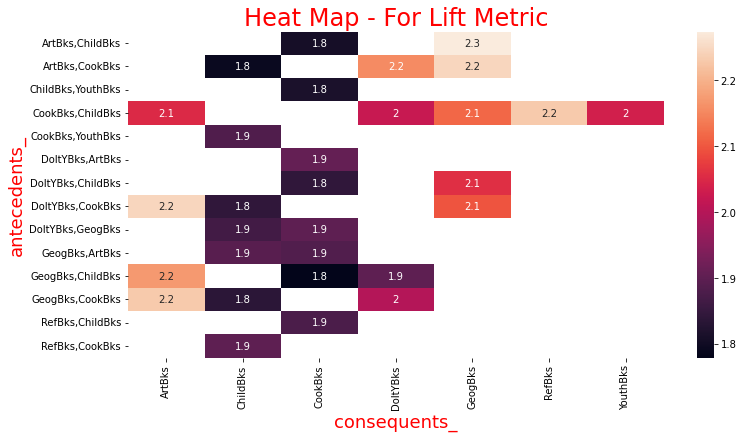

In [63]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot,annot = True)
plt.title('Heat Map - For Lift Metric',color='red',fontsize=24)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel('consequents_',color='red',fontsize=18)
plt.ylabel('antecedents_',color='red',fontsize=18)
plt.show()

# FpGrowth Algorithm

In [65]:
frequent_itemsets_fp=fpgrowth(df, min_support=0.1,use_colnames=True,verbose=1)
frequent_itemsets_fp.shape

9 itemset(s) from tree conditioned on items ()
2 itemset(s) from tree conditioned on items (DoItYBks)
1 itemset(s) from tree conditioned on items (DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (DoItYBks, CookBks)
3 itemset(s) from tree conditioned on items (GeogBks)
2 itemset(s) from tree conditioned on items (GeogBks, DoItYBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, CookBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (GeogBks, ChildBks)
1 itemset(s) from tree conditioned on items (GeogBks, CookBks)
4 itemset(s) from tree conditioned on items (YouthBks)
0 itemset(s) from tree conditioned on items (YouthBks, GeogBks)
0 itemset(s) from tree conditioned on items (YouthBks, DoItYBks)
0 itemset(s) from tree conditioned on items (YouthBks, ChildBks)
1 itemset(s) from tree conditioned on items (YouthBks, CookBks)
1 itemset(s) from tree conditioned on items (ChildBks)
0 itemset

(39, 2)

In [66]:
frequent_itemsets_fp.sort_values("support",ascending=False).head()

,support,itemsets
4,0.431,(CookBks)
3,0.423,(ChildBks)
0,0.282,(DoItYBks)
1,0.276,(GeogBks)
23,0.256,"(CookBks, ChildBks)"


In [67]:
rules_fp = association_rules(frequent_itemsets_fp,metric='confidence',min_threshold=0.5)
rules_fp.shape

(49, 9)

In [68]:
rules_fp[(rules_fp.support>0.15) & (rules_fp.confidence>0.4)].sort_values("confidence",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
6,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
27,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
7,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
34,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


In [69]:
rules_fp['lhs item'] = rules_fp['antecedents'].apply(lambda x:len(x))
rules_fp[rules_fp['lhs item']>1].sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs item
47,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.276,0.1020,0.627692,2.274247,0.057150,1.944628,2
40,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.241,0.1015,0.541333,2.246196,0.056313,1.654797,2
44,"(ArtBks, CookBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063,2
43,"(GeogBks, CookBks)",(ArtBks),0.1925,0.241,0.1035,0.537662,2.230964,0.057107,1.641657,2
46,"(GeogBks, ChildBks)",(ArtBks),0.1950,0.241,0.1020,0.523077,2.170444,0.055005,1.591452,2


Replace Frozen sets with strings¶

In [70]:
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))

Transform the DataFrame of Rules into a Matrix using the confidence metric¶

In [71]:
pivot = rules_fp[rules_fp['lhs item']>1].pivot(index = 'antecedents_',
                                                      columns='consequents_', values='confidence')

# Creating a Heatmap with annotations¶

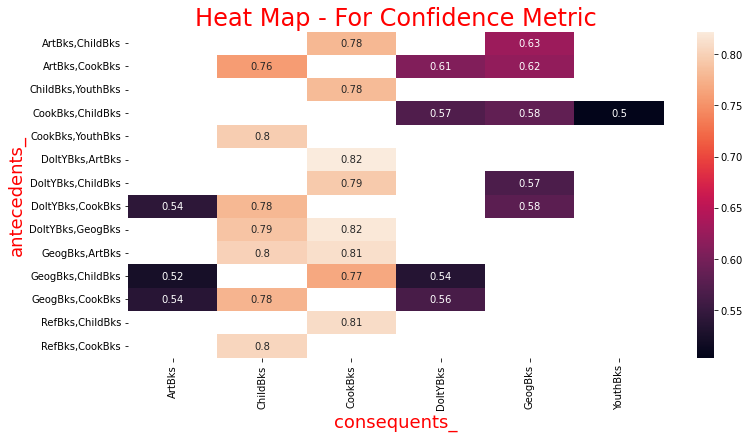

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot,annot = True)
plt.title('Heat Map - For Confidence Metric',color='red',fontsize=24)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel('consequents_',color='red',fontsize=18)
plt.ylabel('antecedents_',color='red',fontsize=18)
plt.show()

In [73]:
rules_fp_li = association_rules(frequent_itemsets_fp,metric="lift",min_threshold=0.6)
rules_fp_li.shape

(100, 9)

In [74]:
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x:len(x))
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
94,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
81,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
88,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
87,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
60,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


Replace Frozen sets with strings

In [75]:
rules_fp_li['antecedents_'] = rules_fp_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp_li['consequents_'] = rules_fp_li['consequents'].apply(lambda a: ','.join(list(a)))

Transform the DataFrame of Rules into a Matrix using the confidence metric

In [76]:
pivot = rules_fp_li[rules_fp_li['lhs items']>1].pivot(index = 'antecedents_',
                                                      columns='consequents_', values='lift')

Creating a Heatmap with annotations

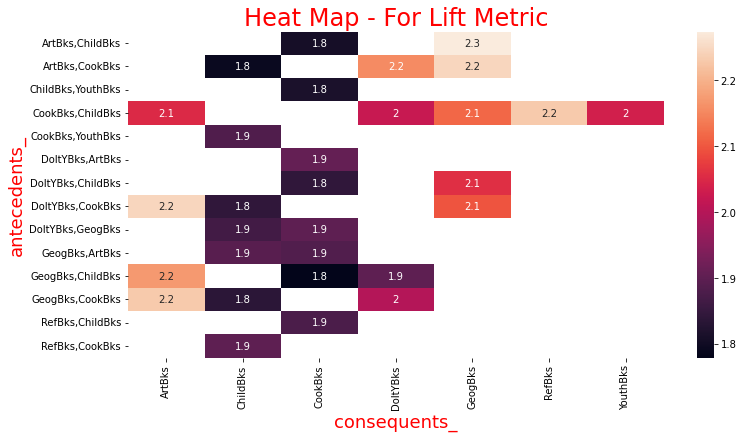

In [77]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot,annot = True)
plt.title('Heat Map - For Lift Metric',color='red',fontsize=24)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel('consequents_',color='red',fontsize=18)
plt.ylabel('antecedents_',color='red',fontsize=18)
plt.show()